In [1]:
import qiskit as q
%matplotlib inline
circuit = q.QuantumCircuit(2,2)

In [2]:
circuit.x(0)
#1,0
circuit.cx(0,1)
#1,1
circuit.measure([0,1],[0,1])

In [3]:
circuit.draw()

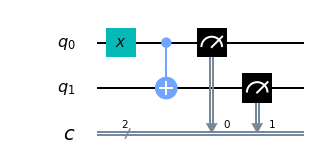

In [4]:
circuit.draw(output="mpl")

In [5]:
from qiskit import IBMQ

IBMQ.save_account("YOUR_TOKEN")

C:\Users\Irfan\Anaconda3\lib\site-packages\qiskit\providers\ibmq\credentials\configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "Simulated"

    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and Simulated qubits
ibmqx2 has 8 queued and 5 qubits
ibmq_16_melbourne has 10 queued and 14 qubits
ibmq_vigo has 7 queued and 5 qubits
ibmq_ourense has 65 queued and 5 qubits
ibmq_london has 22 queued and 5 qubits
ibmq_burlington has 4 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits


In [9]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_essex")
job = q.execute(circuit,backend=backend,shots=500)
job_monitor(job)

Job Status: job has successfully run


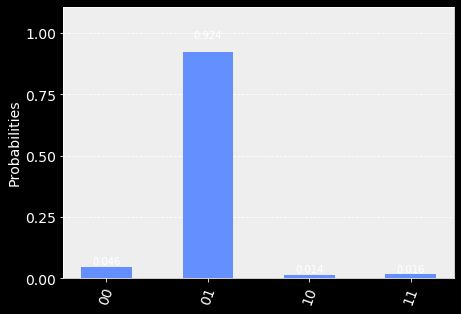

In [13]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

